### Load packages and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

import tensorflow
tensorflow.random.set_seed(42)

In [2]:
# Load data as Pandas dataframe
train = pd.read_csv('/home/hemanth/Documents/DeepLearning/CNN/train_clean_titanic.csv' )
test = pd.read_csv('/home/hemanth/Documents/DeepLearning/CNN/test_clean_titanic.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [3]:
print(train.shape)
print(test.shape)
print(df.shape)

(891, 14)
(418, 14)
(1309, 14)


In [4]:
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [5]:
df.tail()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
413,30.0,NaN,S,0,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr
414,39.0,C105,C,0,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Mrs
415,38.5,NaN,S,0,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr
416,30.0,NaN,S,0,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr
417,4.0,NaN,C,2,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668,Master


In [6]:
df.describe()

,Age,Family_Size,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.562391,0.883881,33.276193,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.165360,1.583639,51.743584,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,0.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,30.000000,0.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.500000,1.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,10.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1309 non-null   object 
 3   Family_Size  1309 non-null   int64  
 4   Fare         1309 non-null   float64
 5   Name         1309 non-null   object 
 6   Parch        1309 non-null   int64  
 7   PassengerId  1309 non-null   int64  
 8   Pclass       1309 non-null   int64  
 9   Sex          1309 non-null   object 
 10  SibSp        1309 non-null   int64  
 11  Survived     891 non-null    float64
 12  Ticket       1309 non-null   object 
 13  Title        1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [8]:
df.isna().sum()

Age               0
Cabin          1014
Embarked          0
Family_Size       0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

In [9]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

        
display_all(df.describe(include='all').T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309,NaN,NaN,NaN,29.5624,13.1654,0.17,22,30,35.5,80
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309,NaN,NaN,NaN,0.883881,1.58364,0,0,0,1,10
Fare,1309,NaN,NaN,NaN,33.2762,51.7436,0,7.8958,14.4542,31.275,512.329
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309,NaN,NaN,NaN,0.385027,0.86556,0,0,0,0,9
PassengerId,1309,NaN,NaN,NaN,655,378.02,1,328,655,982,1309
Pclass,1309,NaN,NaN,NaN,2.29488,0.837836,1,2,3,3,3
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pre-processing

#### Encode Categorical Variables

We need to convert all categorical variables into numeric format. The categorical variables we will be keeping are Embarked, Sex and Title.

The Sex variable can be encoded into single 1-or-0 column, but the other variables will need to be one-hot encoded. Regular label encoding assigns some category labels higher numerical values. This implies some sort of scale (Embarked = 1 is not more than Embarked = 0 - it's just different). One Hot Encoding avoids this problem.

We will assume that there is some ordinality in the Pclass variable, so we will leave that as a single column.

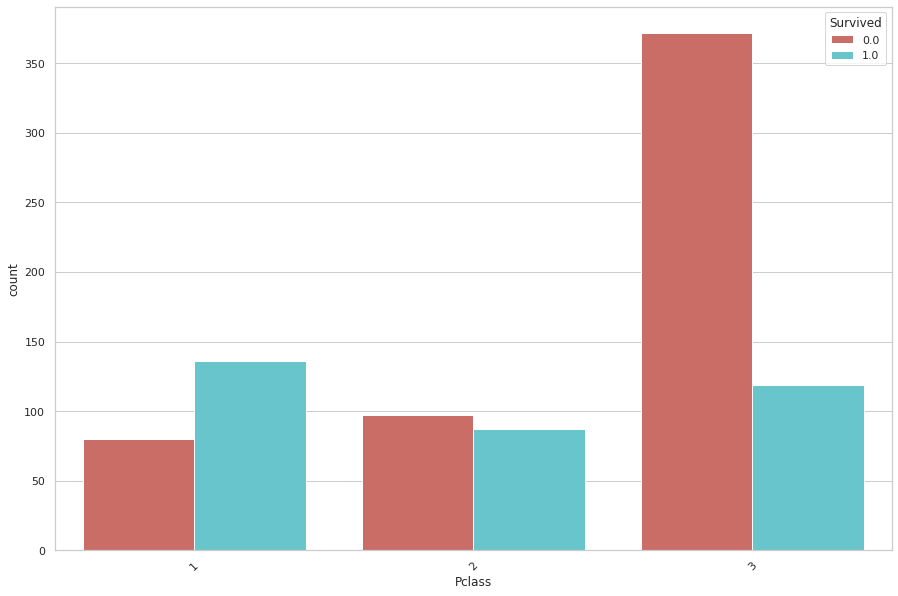

In [10]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()


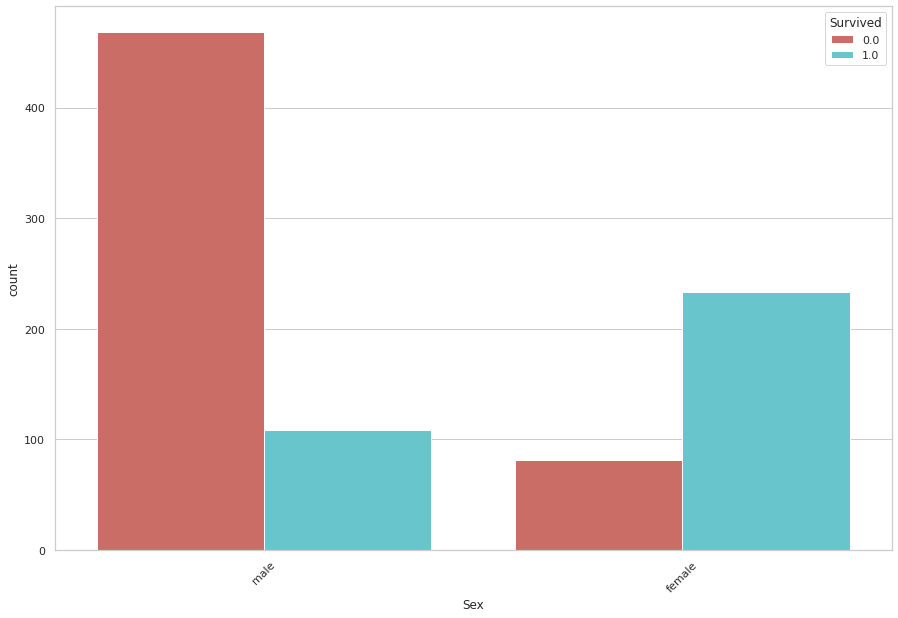

In [11]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()


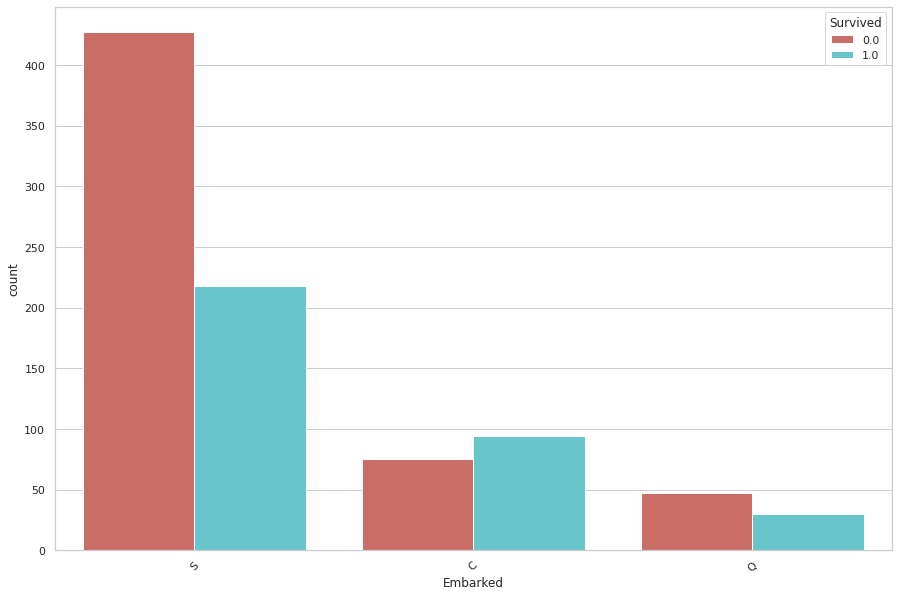

In [12]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [13]:
# convert to cateogry dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [14]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked', 'Title']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]


In [15]:
# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [16]:
df.head()


,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,1,0,0,0,1,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,1,0,0,1,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,1,0,0,0,0,1,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,1,0,0,0,1,0,0


#### Scale Continuous Variables

The continuous variables need to be scaled. This is done using a standard scaler from SkLearn.

In [17]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))


In [18]:
display_all(df.describe(include='all').T)


,count,mean,std,min,25%,50%,75%,max
Age,1309.0,7.327981e-17,1.000382,-2.233408,-0.574635,0.033252,0.451175,3.832549
Family_Size,1309.0,1.628440e-17,1.000382,-0.558346,-0.558346,-0.558346,0.073352,5.758637
Fare,1309.0,2.171254e-17,1.000382,-0.643344,-0.490691,-0.363894,-0.038690,9.261749
Parch,1309.0,1.730218e-17,1.000382,-0.445000,-0.445000,-0.445000,-0.445000,9.956864
Pclass,1309.0,-2.062691e-16,1.000382,-1.546098,-0.352091,0.841916,0.841916,0.841916
Sex,1309.0,6.440031e-01,0.478997,0.000000,0.000000,1.000000,1.000000,1.000000
SibSp,1309.0,-1.628440e-17,1.000382,-0.479087,-0.479087,-0.479087,0.481288,7.203909
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Embarked_C,1309.0,2.070283e-01,0.405331,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_Q,1309.0,9.396486e-02,0.291891,0.000000,0.000000,0.000000,0.000000,1.000000


### Neural Network

Now, all that is left is to feed our data that has been cleaned, encoded and scaled to our neural network.

But first, we need to separate data_df back into train and test sets.

In [19]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

#### Cross-validation

Keras allows us to make use of cross-validation for training our model. So we will use this to train and assess our first model.

### Create neural network model

For this task, I have kept the model architecture pretty simple. We have one input layer with 17 nodes which feeds into a hidden layer with 8 nodes and an output layer which is used to predict a passenger's survival.

The output layer has a sigmoid activation function, which is used to 'squash' all our outputs to be between 0 and 1.

We are going to create a function which allows to parameterise the choice of hyperparameters in the neural network. This might seem a little overly complicated now, but it will come in super handy when we move onto tuning our parameters later.


In [22]:
import tensorflow as tf

In [23]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tf.random.set_seed(42)
    #set_random_seed(see)
    #set_random_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model


In [24]:
model = create_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


### Train model

At this stage, we have our model. We have chosen a few hyperparameters such as the number of hidden layers, the number of neurons and the activation function.

The next step is to train the model on our training set. This step also requires us to choose a few more hyperparameters such as the loss function, the optimization algorithm, the number of epochs and the batch size.


In [25]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))



val_acc: 83.80%


#### Assess results

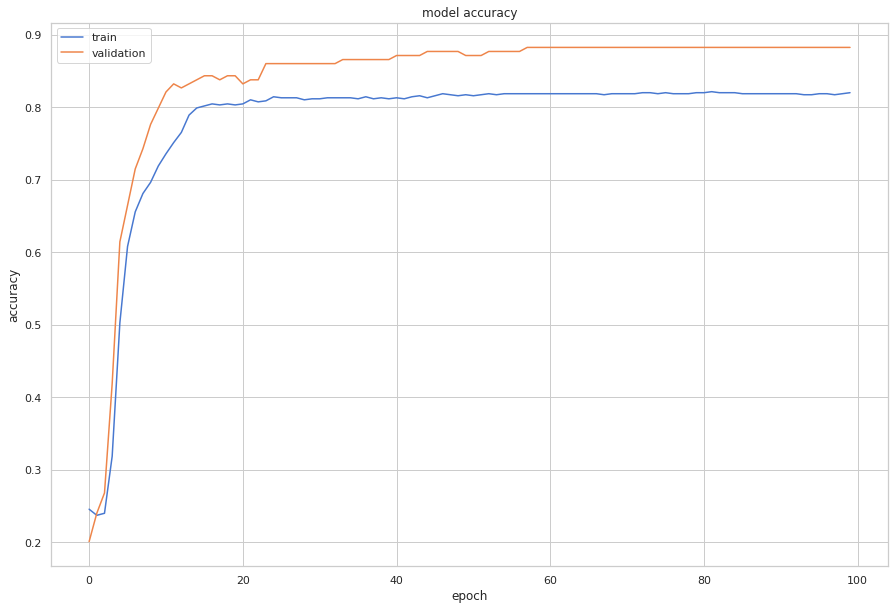

In [26]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### Grid search¶
##### batch size and epochs

We can see from the graph above that we might be training our network for too long. Let's use grid search to find out what the optimal values for batch_size and epochs are.


In [28]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] batch_size=16, epochs=50 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... batch_size=16, epochs=50, total=   1.3s
[CV] batch_size=16, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ......................... batch_size=16, epochs=50, total=   1.3s
[CV] batch_size=16, epochs=50 ........................................
[CV] ......................... batch_size=16, epochs=50, total=   1.3s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=   2.1s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=   2.1s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=   2.3s
[CV] batch_size=32, epochs=50 ........................................
[CV] ......................... batch_size=32, epochs=50, total=   0.8s
[CV] batch_size=32, epochs=50 ........................................
[CV] ......................... batch_size=32, epochs=50, total=   0.9s
[CV] batch_size=32, epochs=50 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   21.7s finished


In [29]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.822671 using {'batch_size': 64, 'epochs': 100}
0.820426 (0.012992) with: {'batch_size': 16, 'epochs': 50}
0.811448 (0.018027) with: {'batch_size': 16, 'epochs': 100}
0.817059 (0.009655) with: {'batch_size': 32, 'epochs': 50}
0.815937 (0.016109) with: {'batch_size': 32, 'epochs': 100}
0.810325 (0.011446) with: {'batch_size': 64, 'epochs': 50}
0.822671 (0.014108) with: {'batch_size': 64, 'epochs': 100}


### Optimization Algorithm

In [30]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... opt=SGD, total=   0.9s
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .......................................... opt=SGD, total=   0.9s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   0.8s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   0.9s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   0.8s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   0.9s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   0.9s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   1.0s
[CV] opt=RMSprop .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.8s finished


In [31]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.828272 using {'opt': 'RMSprop'}
0.800226 (0.028764) with: {'opt': 'SGD'}
0.828272 (0.031152) with: {'opt': 'RMSprop'}
0.255935 (0.025881) with: {'opt': 'Adagrad'}
0.250317 (0.025582) with: {'opt': 'Adadelta'}
0.828272 (0.031152) with: {'opt': 'Adam'}
0.827148 (0.032312) with: {'opt': 'Nadam'}


### Hidden neurons

In [33]:
seed(42)
#set_random_seed(42)
tf.random.set_seed(42)

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] lyrs=[8] ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................................... lyrs=[8], total=   1.0s
[CV] lyrs=[8] ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ......................................... lyrs=[8], total=   0.9s
[CV] lyrs=[8] ........................................................
[CV] ......................................... lyrs=[8], total=   0.9s
[CV] lyrs=[8] ........................................................
[CV] ......................................... lyrs=[8], total=   1.0s
[CV] lyrs=[8] ........................................................
[CV] ......................................... lyrs=[8], total=   0.9s
[CV] lyrs=[10] .......................................................
[CV] ........................................ lyrs=[10], total=   0.9s
[CV] lyrs=[10] .......................................................
[CV] ........................................ lyrs=[10], total=   0.9s
[CV] lyrs=[10] .......................................................
[CV] ........................................ lyrs=[10], total=   0.9s
[CV] lyrs=[10] .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   25.7s finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff0046a1970>, as the constructor either does not set or modifies parameter lyrs

In [34]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828272 using {'opt': 'RMSprop'}
0.800226 (0.028764) with: {'opt': 'SGD'}
0.828272 (0.031152) with: {'opt': 'RMSprop'}
0.255935 (0.025881) with: {'opt': 'Adagrad'}
0.250317 (0.025582) with: {'opt': 'Adadelta'}
0.828272 (0.031152) with: {'opt': 'Adam'}
0.827148 (0.032312) with: {'opt': 'Nadam'}


### Dropout

In [35]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... dr=0.0, total=   0.9s
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ........................................... dr=0.0, total=   0.9s
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=   0.9s
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=   0.9s
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=   0.9s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   0.9s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   0.9s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   1.2s
[CV] dr=0.01 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.7s finished


In [36]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.829396 using {'dr': 0.01}
0.828272 (0.031152) with: {'dr': 0.0}
0.829396 (0.030115) with: {'dr': 0.01}
0.827155 (0.030883) with: {'dr': 0.05}
0.823790 (0.026750) with: {'dr': 0.1}
0.820426 (0.027754) with: {'dr': 0.2}
0.817061 (0.025755) with: {'dr': 0.5}


In [37]:
# create final model
model = create_model(lyrs=[8], dr=0.2)

print(model.summary())

Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_272 (Dense)            (None, 8)                 136       
_________________________________________________________________
dropout_126 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_273 (Dense)            (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


28/28 [==============================] - 0s 690us/step - loss: 0.4121 - accuracy: 0.8238

accuracy: 82.38%


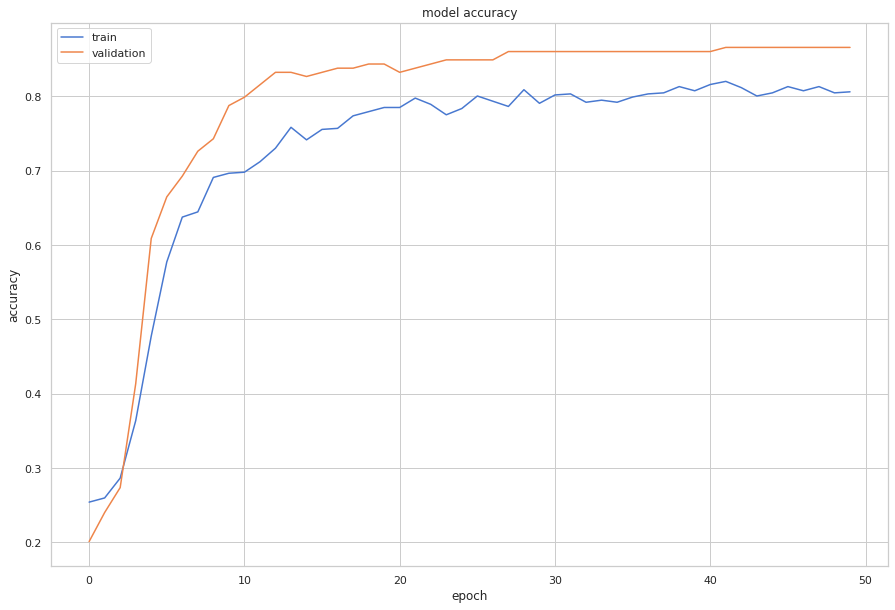

In [39]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Make Predictions on Test Set

Finally, we can attempt to predict which passengers in the test set survived.

In [40]:
# calculate predictions
test['Survived'] = model.predict(X_test)
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
solution = test[['PassengerId', 'Survived']]

In [41]:
solution.head(10)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### Output Final Predictions

In [42]:
solution.to_csv("Neural_Network_Solution1.csv", index=False)
